# Notebook: Análise exploratória de séries temporais
---
## Análise Exploratória de Séries Temporais
> Este notebook permite explorar visualmente e estatisticamente as séries temporais disponíveis no projeto.

In [1]:
# %% 
# Imports principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Imports do projeto
from forecasting_workflow_engine.dataset import fetch_dataset
from forecasting_workflow_engine.plots import plot_forecast,plot_periodogram

2025-10-22 17:13:35.924 | INFO     | forecasting_workflow_engine.config:<module>:7 - PROJ_ROOT path is: C:\Users\leona\Documents\dev\mesc-ia-codes\MESC-IA-Projetos-de-IA\basic_00_forecasting


In [2]:
def plot_trend(y_series, window=12):
    """
    Plota a série original e a tendência estimada via média móvel.
    """
    rolling_mean = y_series.rolling(window=window).mean()
    plt.figure(figsize=(12,6))
    plt.plot(y_series, label="Original")
    plt.plot(rolling_mean, color="orange", label=f"Tendência (rolling mean {window})")
    plt.title("Trend plot (alternativa)")
    plt.xlabel("Data")
    plt.ylabel("Valor")
    plt.legend()
    plt.show()


In [3]:

# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)



### 1. Carregando o Dataset
> Alterar `dataset_name` para a série desejada.


In [4]:

# %%
dataset_name = "air_passengers"  # alterar conforme necessidade
X, y = fetch_dataset(dataset_name)
y_series = y.squeeze()

display(X.head())
display(y_series.head())


2025-10-22 17:13:35 | INFO | dataset:_load_air_passengers:26 - AirPassengers dataset carregado de C:\Users\leona\Documents\dev\mesc-ia-codes\MESC-IA-Projetos-de-IA\basic_00_forecasting\data\processed\air_passengers.csv
2025-10-22 17:13:35 | INFO | dataset:fetch_dataset:67 - Dataset 'air_passengers' carregado com sucesso


,Month
0,1949-01
1,1949-02
2,1949-03
3,1949-04
4,1949-05


0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64


### 2. Estatísticas Básicas


In [5]:

print("Estatísticas descritivas da série:")
display(y_series.describe())


Estatísticas descritivas da série:


count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

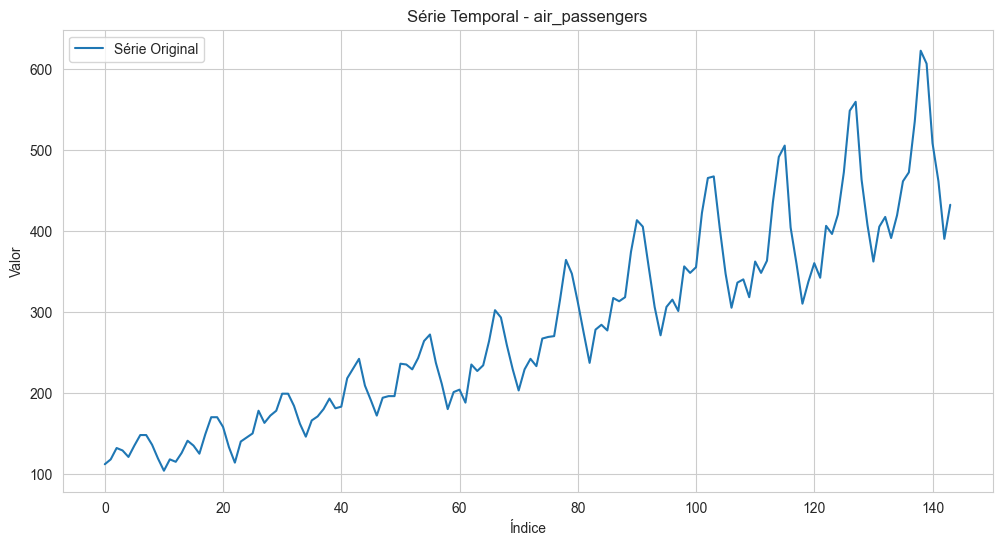

In [6]:

# %%
# Visualizando a série temporal
# plt.figure()

plt.figure(figsize=(12,6))
plt.plot(y_series, label='Série Original')
plt.title(f'Série Temporal - {dataset_name}')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()


### 3. Tendência e sazonalidade


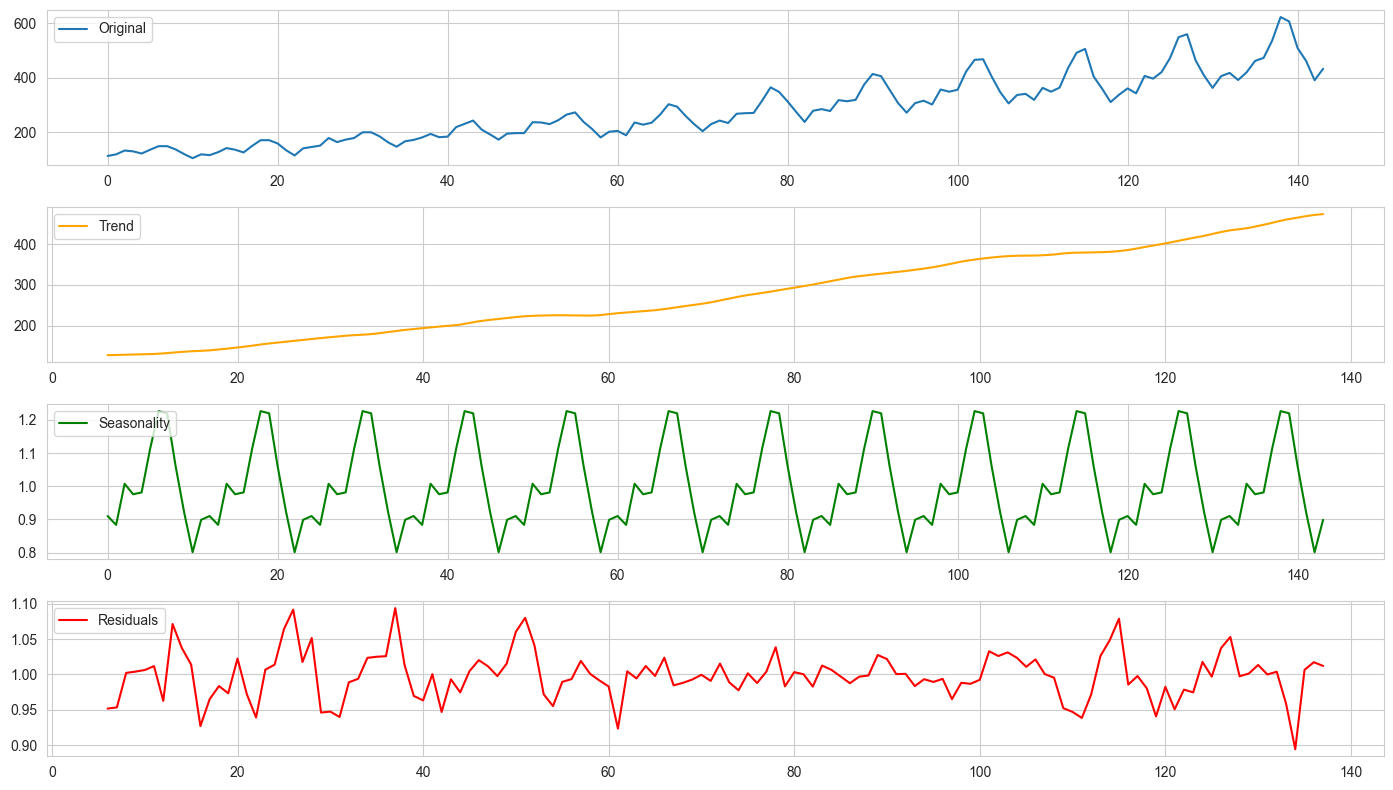

In [7]:

# %%
decomposition = seasonal_decompose(y_series, model='multiplicative', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(y_series, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



### 4. Autocorrelação e autocorrelação parcial


<Figure size 1400x500 with 0 Axes>

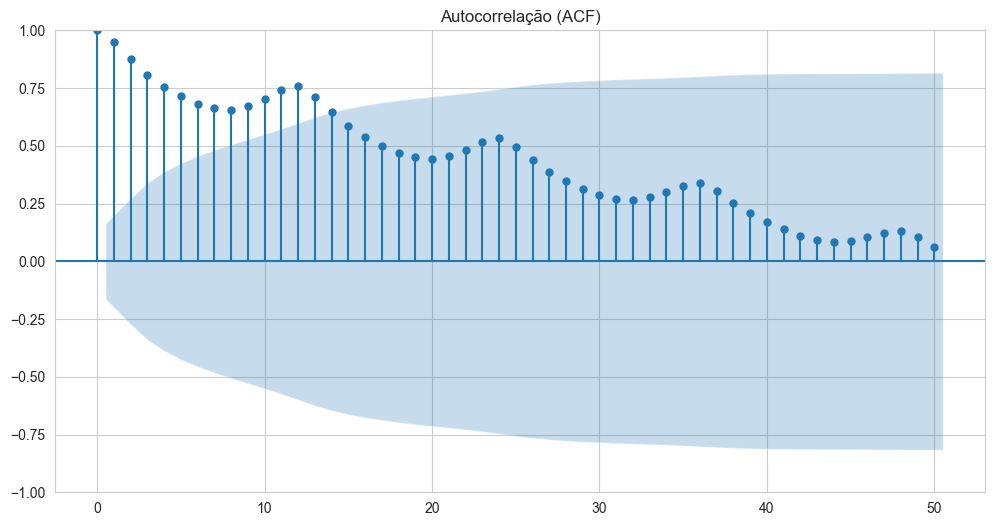

<Figure size 1400x500 with 0 Axes>

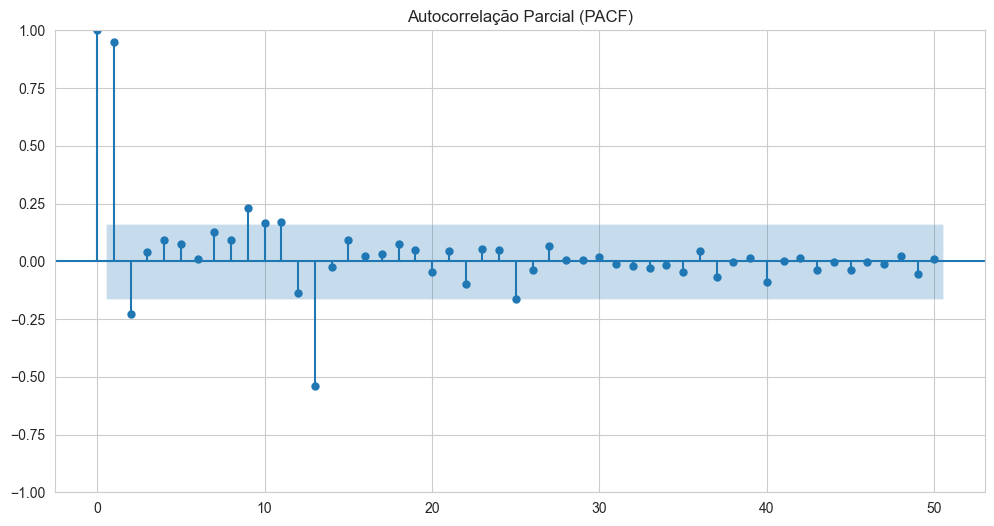

In [8]:

# %%
plt.figure(figsize=(14,5))
plot_acf(y_series, lags=50)
plt.title('Autocorrelação (ACF)')
plt.show()

plt.figure(figsize=(14,5))
plot_pacf(y_series, lags=50)
plt.title('Autocorrelação Parcial (PACF)')
plt.show()



### 5. Outras visualizações do projeto
#### Plotando tendência


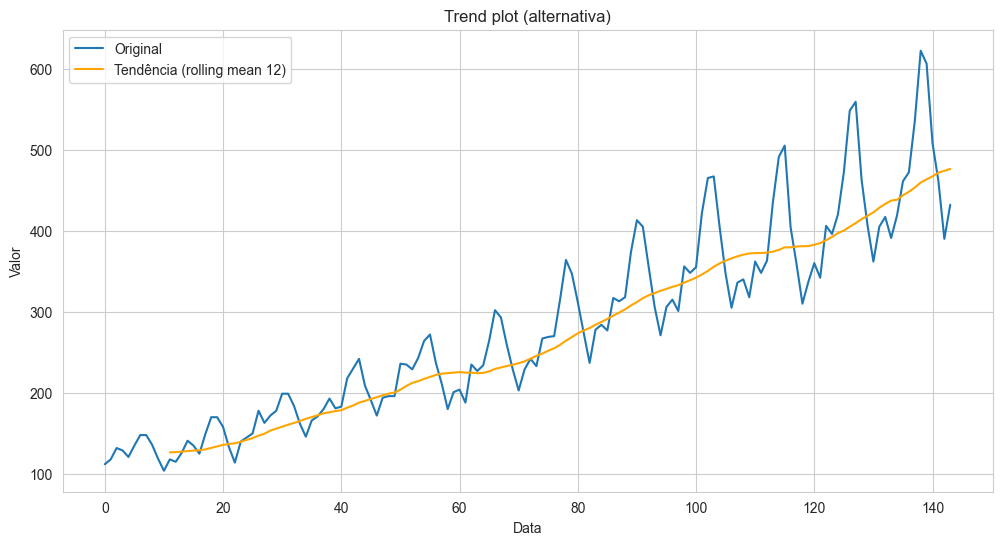

In [9]:

try:
    from forecasting_workflow_engine.plots import plot_trend
    plot_trend(y_series)
except Exception as e:
    print("Função plot_trend não disponível, usando média móvel como tendência:", e)
    plt.figure(figsize=(12,6))
    plt.plot(y_series.rolling(window=12).mean(), label='Tendência (média móvel)')
    plt.title("Trend plot (alternativa)")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.legend()
    plt.show()


### 6. Estatísticas adicionais

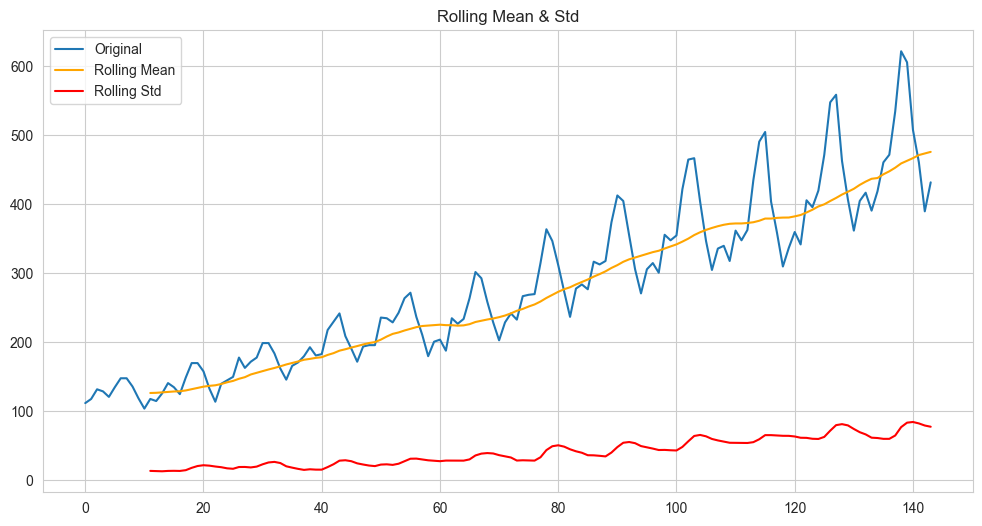

In [10]:

# %%
y_rolling = y_series.rolling(window=12)
plt.figure()
plt.plot(y_series, label='Original')
plt.plot(y_rolling.mean(), label='Rolling Mean', color='orange')
plt.plot(y_rolling.std(), label='Rolling Std', color='red')
plt.title("Rolling Mean & Std")
plt.legend()
plt.show()


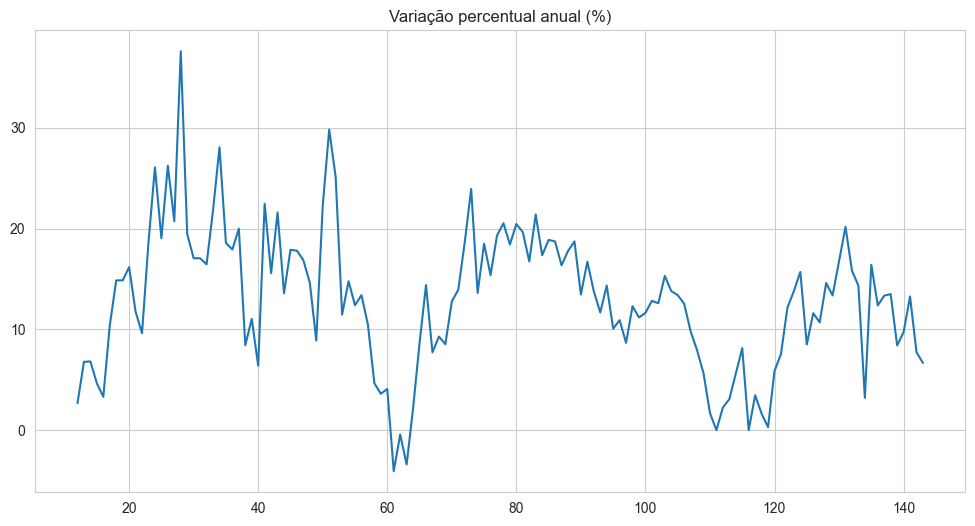

In [11]:

# %%
# Variação percentual ano a ano
y_pct_change = y_series.pct_change(periods=12) * 100
plt.figure()
plt.plot(y_pct_change)
plt.title("Variação percentual anual (%)")
plt.show()


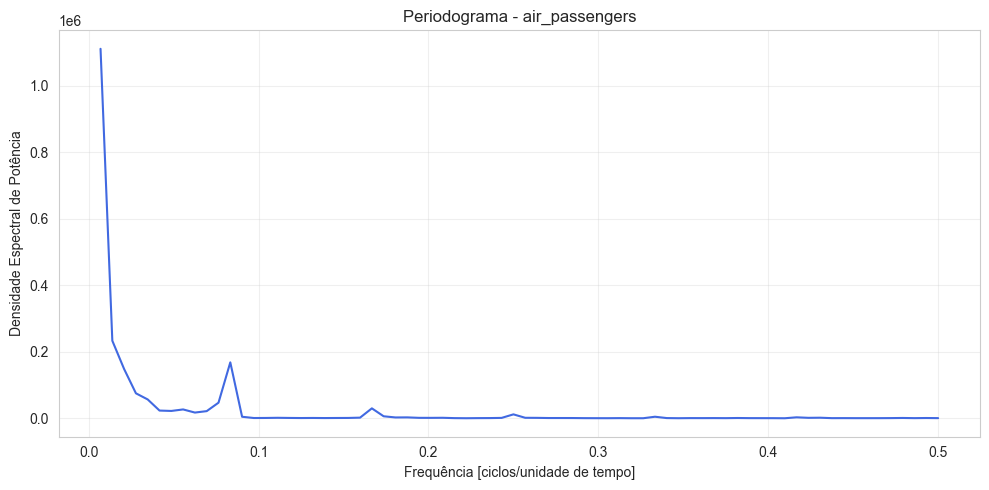

2025-10-22 17:13:37 | INFO | plots:plot_periodogram:113 - 📈 Frequência dominante: 0.0069
2025-10-22 17:13:37 | INFO | plots:plot_periodogram:114 - 📆 Período estimado: 144.00 unidades de tempo por ciclo
2025-10-22 17:13:37 | INFO | plots:plot_periodogram:115 - ⚡ Contribuição energética do pico: 54.03% da energia total
2025-10-22 17:13:37 | INFO | plots:plot_periodogram:133 - 🧭 Interpretação automática: O gráfico mostra um pico dominante em frequência 0.007, indicando uma **sazonalidade forte** com período aproximado de 144.00 unidades de tempo.


(array([0.00694444, 0.01388889, 0.02083333, 0.02777778, 0.03472222,
        0.04166667, 0.04861111, 0.05555556, 0.0625    , 0.06944444,
        0.07638889, 0.08333333, 0.09027778, 0.09722222, 0.10416667,
        0.11111111, 0.11805556, 0.125     , 0.13194444, 0.13888889,
        0.14583333, 0.15277778, 0.15972222, 0.16666667, 0.17361111,
        0.18055556, 0.1875    , 0.19444444, 0.20138889, 0.20833333,
        0.21527778, 0.22222222, 0.22916667, 0.23611111, 0.24305556,
        0.25      , 0.25694444, 0.26388889, 0.27083333, 0.27777778,
        0.28472222, 0.29166667, 0.29861111, 0.30555556, 0.3125    ,
        0.31944444, 0.32638889, 0.33333333, 0.34027778, 0.34722222,
        0.35416667, 0.36111111, 0.36805556, 0.375     , 0.38194444,
        0.38888889, 0.39583333, 0.40277778, 0.40972222, 0.41666667,
        0.42361111, 0.43055556, 0.4375    , 0.44444444, 0.45138889,
        0.45833333, 0.46527778, 0.47222222, 0.47916667, 0.48611111,
        0.49305556, 0.5       ]),
 array([1.1119

In [12]:
# Exibe o periodograma com análise
plot_periodogram(y_series, sampling_rate=1.0, title=f"Periodograma - {dataset_name}", verbose=True)
